In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
data = pd.read_csv("C:/Users/mithi/Documents/python/SampleSuperstore.csv")

In [3]:
#1 understanding the data

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [8]:
#Checking the data types
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

All the datatypes are correct

In [11]:
data.shape

(9994, 13)

data.describe()

We can use seaborn to create a heatmap of missing data

In [12]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [15]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [16]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [17]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [2]:
#cleaning the data
#checking outliers

In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


By observing the data, we can see that there are no missing value but outliers are present as the difference is more between the maximum and 75% of the Sales column

In [9]:
data.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [9]:
data.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


Here everything is false so this suggests that there are no missing values

<AxesSubplot:>

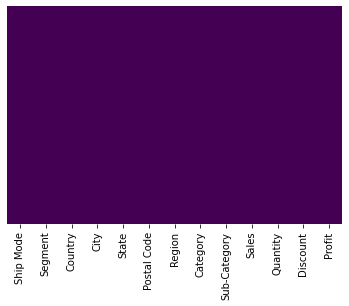

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Heat map has no different colour which clearly states that there are no missing values

This basically shows unique values for each column

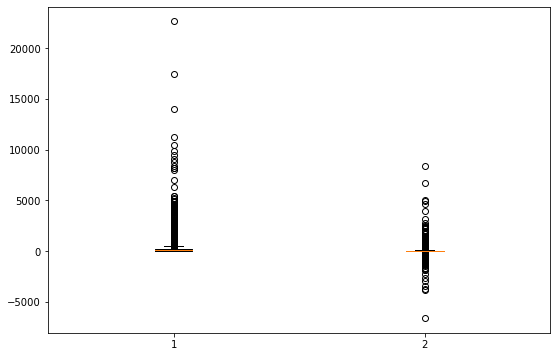

In [12]:
df = data.filter(['Sales', 'Profit'])
fig= plt.figure(1, figsize=(9,6))
ax= fig.add_subplot(111)
bp= ax.boxplot(df)

In [13]:
''' Detection '''
# IQR
Q1 = np.percentile(data['Sales'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(data['Sales'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", data.shape) 
  
# Upper bound
upper = np.where(data['Sales'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['Sales'] <= (Q1-1.5*IQR))
  
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
  
print("New Shape: ", data.shape)

Old Shape:  (9994, 13)
New Shape:  (8827, 13)


After removing the outliers, we find the new data set above which is a cleaned dataset.

In [19]:
#relationship analysis

#Univariate analysis

In [24]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [25]:
data['Segment'].value_counts()/len(data['Segment'])*100

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

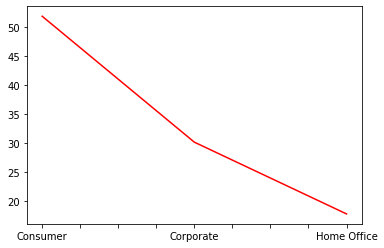

In [26]:
S=(data['Segment'].value_counts()/len(data['Segment'])*100).plot(kind='line',color='r')

([<matplotlib.patches.Wedge at 0x1d174423460>,
 [Text(-0.0831139288001966, 1.0968555396402007, 'Consumer'),
  Text(-0.5089409995355012, -0.9751815518106385, 'Corporate'),
  Text(0.9339392466658152, -0.5811690662253883, 'Home Office')],
 [Text(-0.04533487025465269, 0.5982848398037458, '52.4%'),
  Text(-0.2776041815648188, -0.53191721007853, '29.9%'),
  Text(0.5094214072722627, -0.31700130885021177, '17.7%')])

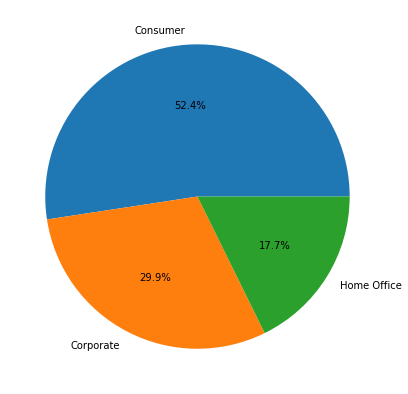

In [32]:
fig = plt.figure(figsize =(10, 7))
df = data['Segment'].unique()
a = data['Segment'].value_counts()/len(data['Segment'])*100
plt.pie(a, labels = df, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1d174059610>,
 [Text(0.9580935927737082, 0.5404226748443924, 'Bookcases'),
  Text(0.06319215403776976, 1.0981833870843554, 'Labels'),
  Text(-0.7564252590686485, 0.7986368558005122, 'Storage'),
  Text(-1.0780688923159767, 0.21855768899904493, 'Furnishings'),
  Text(-1.0391414794401694, -0.3608115653729742, 'Art'),
  Text(-0.7374585010014607, -0.8161831652886985, 'Binders'),
  Text(-0.2641974550814029, -1.067801341415392, 'Appliances'),
  Text(0.1589766830642243, -1.088451383499464, 'Paper'),
  Text(0.45831581230308366, -0.9999733077402441, 'Phones'),
  Text(0.7064497043839156, -0.8431659475903177, 'Chairs'),
  Text(0.8726787395215584, -0.6696505189926043, 'Accessories'),
  Text(0.9719928459719496, -0.5150047644239326, 'Envelopes'),
  Text(1.0343001316133247, -0.37446393383697074, 'Fasteners'),
  Text(1.0727247778414668, -0.2434369548876584, 'Supplies'),
  Text(1.094186348606234, -0.11294350146758056, 'Tables'),
  Text(1.0996185174755044, -0.028967499460

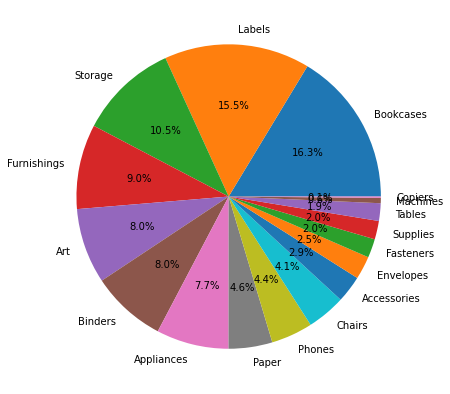

In [34]:
fig = plt.figure(figsize =(10, 7))
df = data['Sub-Category'].unique()
a = data['Sub-Category'].value_counts()
plt.pie(a, labels = df, autopct='%1.1f%%'

([<matplotlib.patches.Wedge at 0x1d174008b80>,
 [Text(-0.49535645050358756, 0.9821517127941524, 'Furniture'),
  Text(-0.05263622635959046, -1.0987399272232816, 'Office Supplies'),
  Text(0.9573233046176332, -0.5417860190480873, 'Technology')],
 [Text(-0.27019442754741135, 0.5357191160695376, '64.9%'),
  Text(-0.028710668923412973, -0.5993126875763354, '18.7%'),
  Text(0.5221763479732544, -0.2955196467535022, '16.4%')])

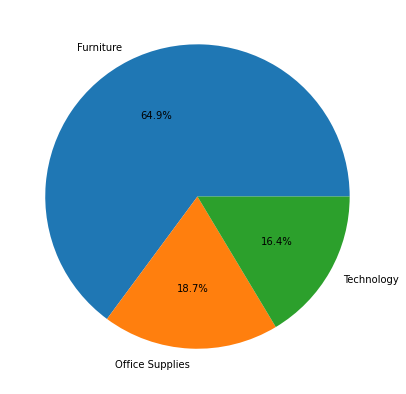

In [33]:
fig = plt.figure(figsize =(10, 7))
df = data['Category'].unique()
a = data['Category'].value_counts()
plt.pie(a, labels = df, autopct='%1.1f%%')

In [15]:
#Bivariate analysis

In [22]:
df_gr = data.groupby('Region').sum()
[['sales']]
df_gr

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,151786150,501239.8908,8780,558.34,39706.3625
East,50171698,678781.2400,10618,414.00,91522.7800
South,55875052,391721.9050,6209,238.55,46749.4303
West,293739752,725457.8245,12266,350.20,108418.4489


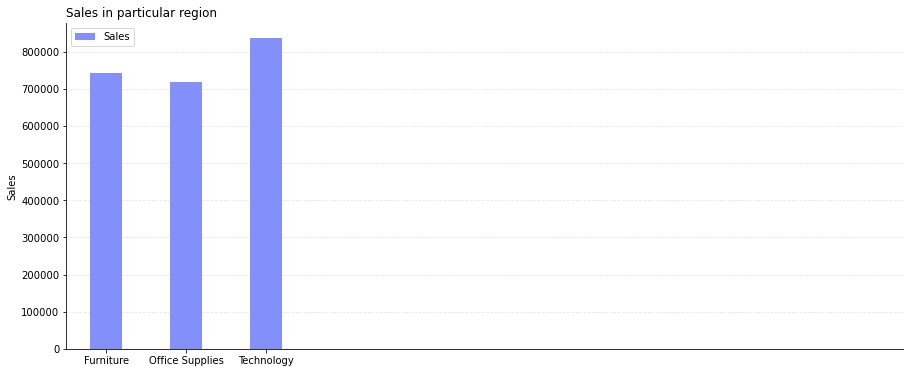

In [145]:
fig, ax = plt.subplots(1, figsize=(15, 6))
# numerical x
x = np.arange(0, len(df_gr.index))
# plot bars
plt.bar(x, df_gr['Sales'], width = 0.4, color = '#8390FA')
#plt.bar(x - 0.2, df_gr['Quantity'], width = 0.4, color = '#8390FA')
#plt.bar(x + 0.2, df_gr['Discount'], width = 0.4, color = '#6EAF46')
#plt.bar(x + 0.5, df_gr['Profit'], width = 0.4, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Sales')
plt.xticks(x, df_gr.index)
plt.xlim(-0.5, 10)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Sales in particular region', loc ='left')
plt.legend(['Sales', 'EU', 'JP', 'Others'], loc='upper left', ncol = 4)
plt.show()

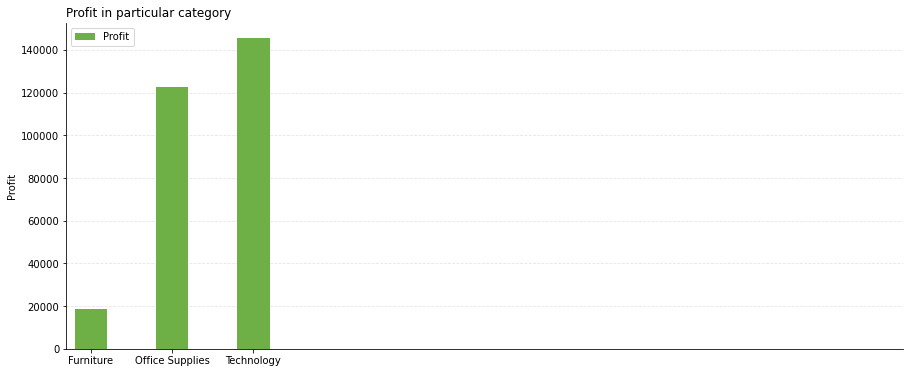

In [146]:
df_gr = data.groupby('Category').sum()
[['Profit']]
df_gr

fig, ax = plt.subplots(1, figsize=(15, 6))
# numerical x
x = np.arange(0, len(df_gr.index))
# plot bars
plt.bar(x, df_gr['Profit'],align= 'center', width = 0.4, color = '#6EAF46')
#plt.bar(x - 0.2, df_gr['Quantity'], width = 0.4, color = '#8390FA')
#plt.bar(x + 0.2, df_gr['Discount'], width = 0.4, color = '#6EAF46')
#plt.bar(x + 0.5, df_gr['Profit'], width = 0.4, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Profit')
plt.xticks(x, df_gr.index)
plt.xlim(-0.3, 10)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Profit in particular category', loc ='left')
plt.legend(['Profit', 'EU', 'JP', 'Others'], loc='upper left', ncol = 4)
plt.show()

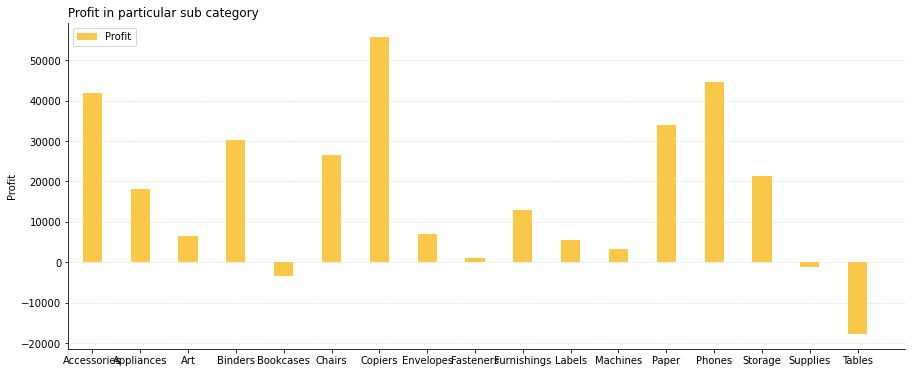

In [147]:
df_gr = data.groupby('Sub-Category').sum()
[['Profit']]
df_gr

fig, ax = plt.subplots(1, figsize=(15, 6))
# numerical x
x = np.arange(0, len(df_gr.index))
# plot bars
plt.bar(x, df_gr['Profit'],align= 'center', width = 0.4, color = '#FAC748')
#plt.bar(x - 0.2, df_gr['Quantity'], width = 0.4, color = '#8390FA')
#plt.bar(x + 0.2, df_gr['Discount'], width = 0.4, color = '#6EAF46')
#plt.bar(x + 0.5, df_gr['Profit'], width = 0.4, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Profit')
plt.xticks(x, df_gr.index)
plt.xlim(-0.5, 17)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Profit in particular sub category', loc ='left')
plt.legend(['Profit', 'EU', 'JP', 'Others'], loc='upper left', ncol = 4)
plt.show()

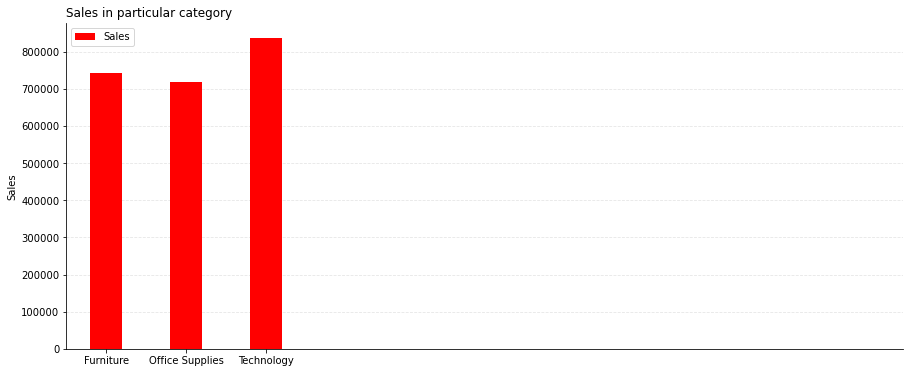

In [148]:
df_gr = data.groupby('Category').sum()
[['Sales']]
df_gr

fig, ax = plt.subplots(1, figsize=(15, 6))
# numerical x
x = np.arange(0, len(df_gr.index))
# plot bars
plt.bar(x, df_gr['Sales'],align= 'center', width = 0.4, color = 'r')
#plt.bar(x - 0.2, df_gr['Quantity'], width = 0.4, color = '#8390FA')
#plt.bar(x + 0.2, df_gr['Discount'], width = 0.4, color = '#6EAF46')
#plt.bar(x + 0.5, df_gr['Profit'], width = 0.4, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Sales')
plt.xticks(x, df_gr.index)
plt.xlim(-0.5, 10)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Sales in particular category', loc ='left')
plt.legend(['Sales', 'EU', 'JP', 'Others'], loc='upper left', ncol = 4)
plt.show()

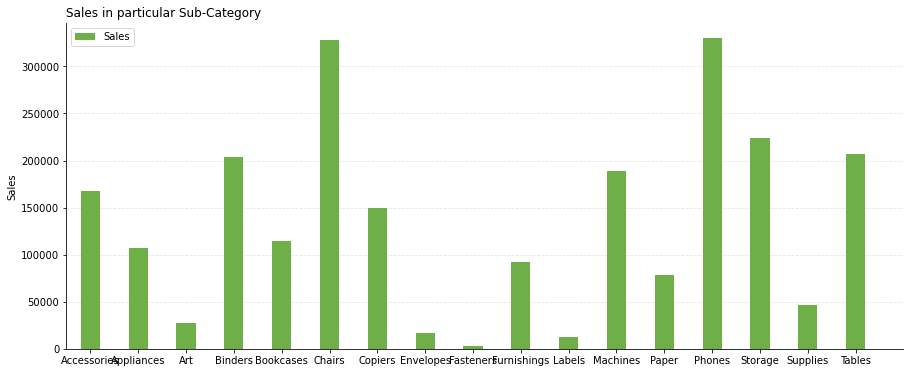

In [149]:
df_gr = data.groupby('Sub-Category').sum()
[['Sales']]
df_gr

fig, ax = plt.subplots(1, figsize=(15, 6))
# numerical x
x = np.arange(0, len(df_gr.index))
# plot bars
plt.bar(x, df_gr['Sales'],align= 'center', width = 0.4, color = '#6EAF47')
#plt.bar(x - 0.2, df_gr['Quantity'], width = 0.4, color = '#8390FA')
#plt.bar(x + 0.2, df_gr['Discount'], width = 0.4, color = '#6EAF46')
#plt.bar(x + 0.5, df_gr['Profit'], width = 0.4, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Sales')
plt.xticks(x, df_gr.index)
plt.xlim(-0.5, 17)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Sales in particular Sub-Category', loc ='left')
plt.legend(['Sales', 'EU', 'JP', 'Others'], loc='upper left', ncol = 4)
plt.show()

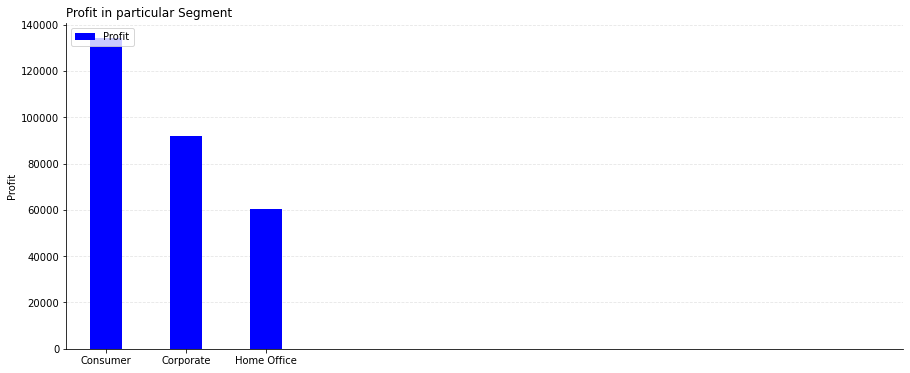

In [150]:
df_gr = data.groupby('Segment').sum()
[['Profit']]
df_gr

fig, ax = plt.subplots(1, figsize=(15, 6))
# numerical x
x = np.arange(0, len(df_gr.index))
# plot bars
plt.bar(x, df_gr['Profit'],align= 'center', width = 0.4, color = 'b')
#plt.bar(x - 0.2, df_gr['Quantity'], width = 0.4, color = '#8390FA')
#plt.bar(x + 0.2, df_gr['Discount'], width = 0.4, color = '#6EAF46')
#plt.bar(x + 0.5, df_gr['Profit'], width = 0.4, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Profit')
plt.xticks(x, df_gr.index)
plt.xlim(-0.5, 10)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Profit in particular Segment', loc ='left')
plt.legend(['Profit', 'EU', 'JP', 'Others'], loc='upper left', ncol = 4)
plt.show()

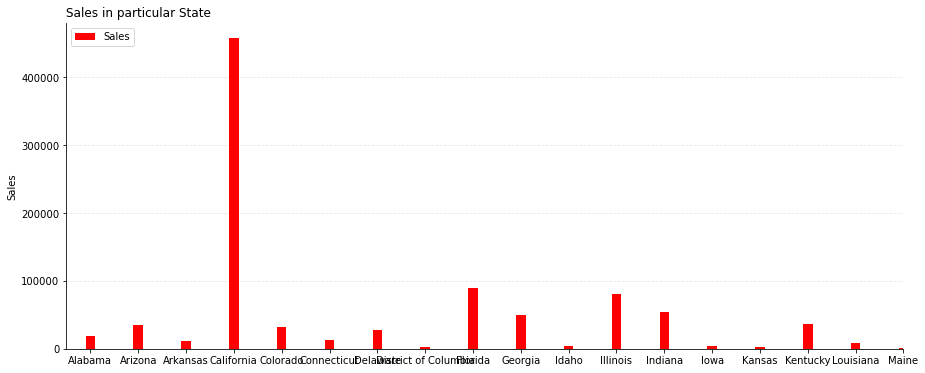

In [151]:
df_gr = data.groupby('State').sum()
[['Sales']]
df_gr

fig, ax = plt.subplots(1, figsize=(15, 6))
# numerical x
x = np.arange(0, len(df_gr.index))
# plot bars
plt.bar(x, df_gr['Sales'],align= 'center', width = 0.2, color = 'r')
#plt.bar(x - 0.2, df_gr['Quantity'], width = 0.4, color = '#8390FA')
#plt.bar(x + 0.2, df_gr['Discount'], width = 0.4, color = '#6EAF46')
#plt.bar(x + 0.5, df_gr['Profit'], width = 0.4, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Sales')
plt.xticks(x, df_gr.index)
plt.xlim(-0.5, 17)
# grid lines

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Sales in particular State', loc ='left')
plt.legend(['Sales', 'EU', 'JP', 'Others'], loc='upper left', ncol = 4)
plt.show()

In [153]:
data.pivot_table(values='Profit', index='Segment', columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


In [154]:
data.pivot_table(values='Sales', index='Segment', columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


In [ ]:
#Multivariate analysis

In [20]:
corelation = data.corr()

<AxesSubplot:>

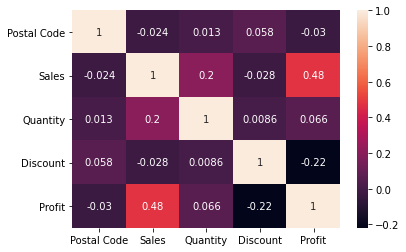

In [21]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

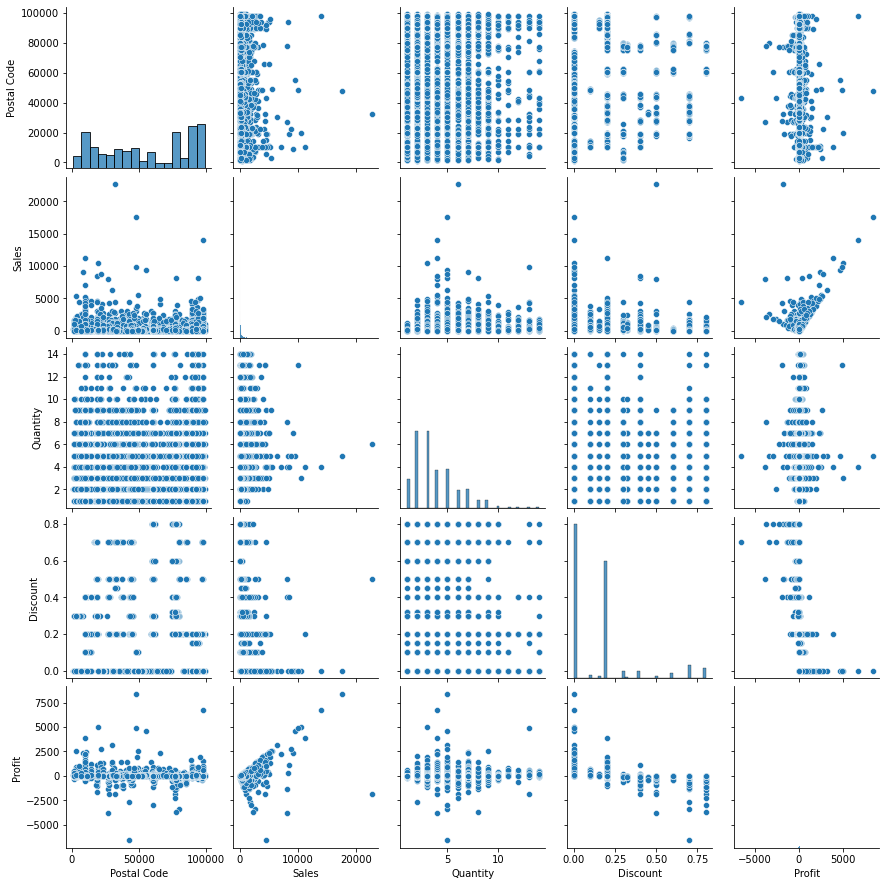

In [22]:
sns.pairplot(data)

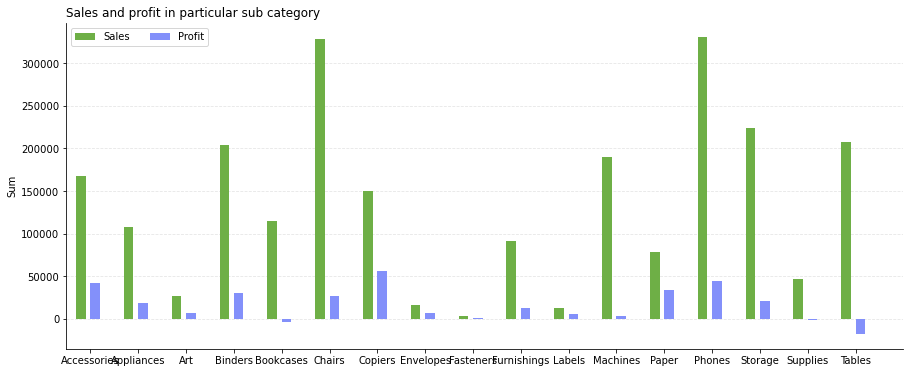

In [128]:
df_gr = data.groupby(["Sub-Category"]).sum()
[['Sales']]
df_gr

fig, ax = plt.subplots(1, figsize=(15, 6))
# numerical x
x = np.arange(0, len(df_gr.index))
# plot bars
plt.bar(x - 0.2, df_gr['Sales'],align= 'center', width = 0.2, color = '#6EAF46')
#plt.bar(x - 0.1, df_gr['Quantity'], width = 0.4, color = '#8390FA')
#plt.bar(x + 0.1, df_gr['Discount'], width = 0.4, color = '#6EAF46')
plt.bar(x + 0.1, df_gr['Profit'], width = 0.2, color = '#8390FA')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Sum')
plt.xticks(x, df_gr.index)
plt.xlim(-0.5, 17)
# grid lines

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Sales and profit in particular sub category', loc ='left')
plt.legend(['Sales', 'Profit', 'JP', 'Others'], loc='upper left', ncol = 4)
plt.show()

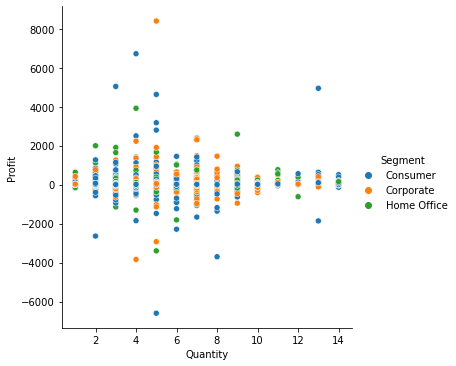

In [19]:
sns.relplot(x= 'Quantity', y= 'Profit', hue='Segment', data=data)

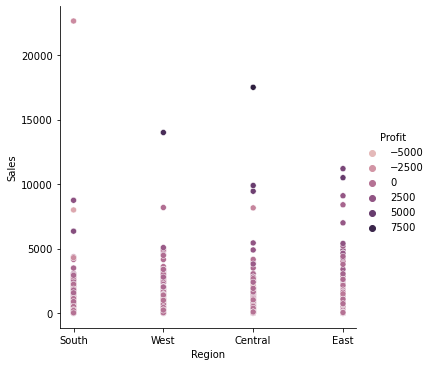

In [18]:
sns.relplot(x= 'Region', y= 'Sales', hue='Profit', data=data)

From here we get to know that highest sales were in the central region with a good profit and south region has lesser sales as compared to other regions with less profit

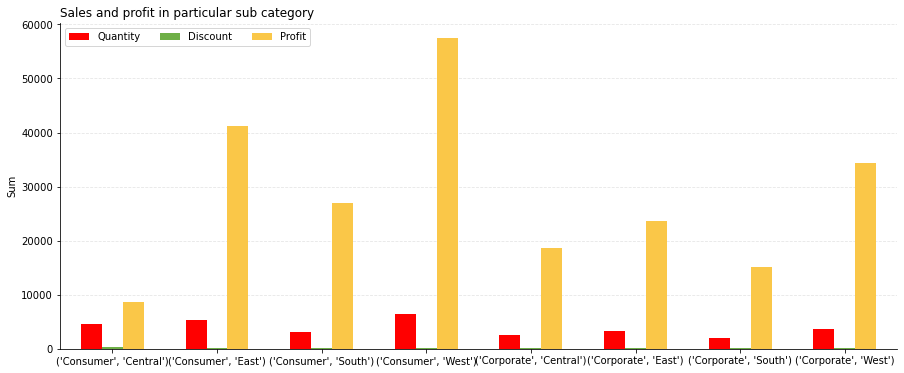

In [136]:
df_gr = data.groupby(["Segment","Region"]).sum()
[['Sales']]
df_gr

fig, ax = plt.subplots(1, figsize=(15, 6))
# numerical x
x = np.arange(0, len(df_gr.index))
# plot bars
plt.bar(x - 0.2, df_gr['Quantity'],align= 'center', width = 0.2, color = 'r')
#plt.bar(x - 0.1, df_gr['Quantity'], width = 0.4, color = '#8390FA')
plt.bar(x + 0.1, df_gr['Discount'], width = 0.4, color = '#6EAF46')
plt.bar(x + 0.2, df_gr['Profit'], width = 0.2, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Sum')
plt.xticks(x, df_gr.index)
plt.xlim(-0.5, 7.5)

# grid lines

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Sales and profit in particular sub category', loc ='left')
plt.legend(['Quantity', 'Discount', 'Profit', 'Others'], loc='upper left', ncol = 4)
plt.show()

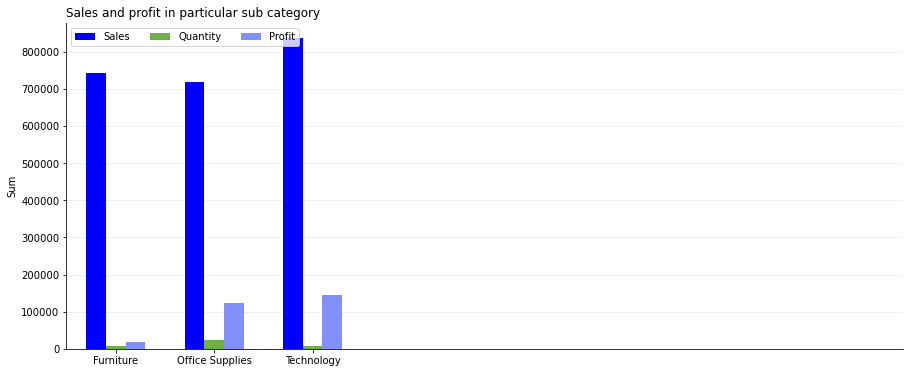

In [144]:
df_gr = data.groupby(["Category"]).sum()
[['Sales']]
df_gr

fig, ax = plt.subplots(1, figsize=(15, 6))
# numerical x
x = np.arange(0, len(df_gr.index))
# plot bars
plt.bar(x - 0.2, df_gr['Sales'],align= 'center', width = 0.2, color = 'b')
#plt.bar(x - 0.1, df_gr['Quantity'], width = 0.4, color = '#8390FA')
plt.bar(x + 0.1, df_gr['Quantity'], width = 0.4, color = '#6EAF46')
plt.bar(x + 0.2, df_gr['Profit'], width = 0.2, color = '#8390FA')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Sum')
plt.xticks(x, df_gr.index)
plt.xlim(-0.5, 8)
# grid lines

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Sales and profit in particular sub category', loc ='left')
plt.legend(['Sales', 'Quantity', 'Profit', 'Others'], loc='upper left', ncol = 4)
plt.show()

<AxesSubplot:xlabel='Segment,Discount'>

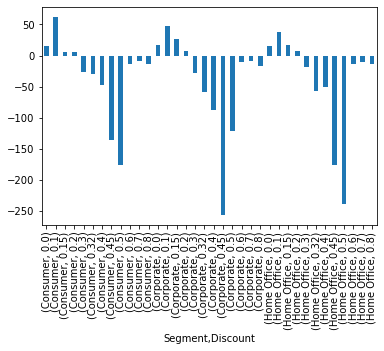

In [155]:
temp = data.groupby(['Segment', 'Discount']).Profit.median()
temp.plot(kind='bar', stacked = True)